In [4]:
import chem_ocean.ocean_plt as oc_plt
import chem_ocean.ocean_analysis as oc_an

from chem_ocean import ocean_data as oc_data
from chem_ocean.ocean_plt_util import make_section, subplot_labels, save_name

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from scipy import stats
title_sz = 27
axis_sz = 22
tick_sz = 21

%matplotlib inline

In [6]:
path = 'raw_demo_plots/'

In [9]:
minlat, minlon = -40, -30
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([minlat, minlat+2], [minlon, minlon+2], ['nitrate'])

0.23725008964538574


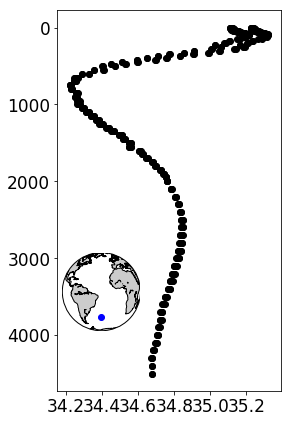

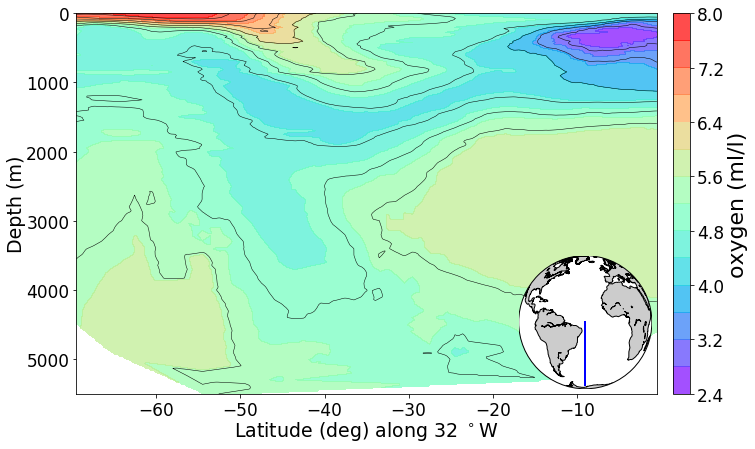

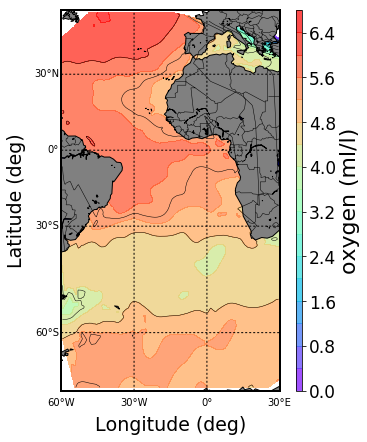

In [10]:
minlat, minlon = -40, -30
fig, (ax1) = oc_plt.plotRaw(minlat, minlat+2, minlon, minlon+2, ['salinity'], 'column')
# plt.savefig(path+'nitrate_column_40s30w.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

fig, (ax1) = oc_plt.plotRaw(-70, 0, -32, -32, ['oxygen'], 'NS_section')
# plt.savefig(path+'nitrate_section_70-0s32w.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

fig, (ax1) = oc_plt.plotRaw(-90, 90, -180, 180, ['phostphate'], 'plan', depth = 25, plot_pt = (68.5, -99.5)
# plt.savefig(path+'nitrate_plan_70s-50n_60w-30e_2000m.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

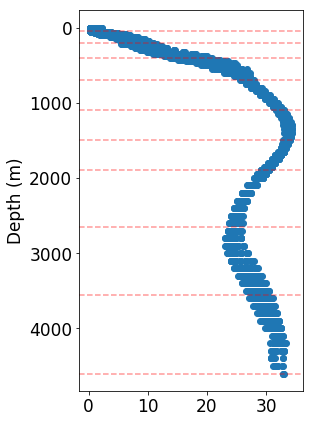

In [4]:
_x, _y, _d, _feat_data, _basemap, _xLab, _yLab, _latLon_params = oc_data.get_column([-40, -35], [-30, -25], ['nitrate'])
intervals, fig, ax =oc_an.column_split_ptest(_feat_data, _d)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


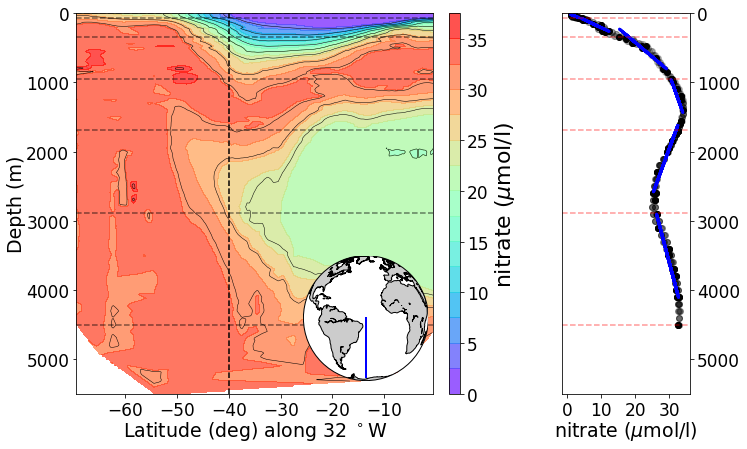

In [5]:
fig, (ax1, ax2) = oc_plt.plotRaw(-70, 0, -32, -32, ['nitrate'], 'NS_section', add_profile = True)
intervals, fig, ax2 = oc_an.column_split_byslope(_feat_data, _d, exist_plt = (fig, ax2), depth_lim = ax1.get_ylim())

# add annotation from profile to section plot
ax1.axvline(minlat, color='k', linestyle='--')
for depth in intervals:
    ax1.axhline(depth, color='k', linestyle='--', alpha = .5)

0.10109210014343262


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


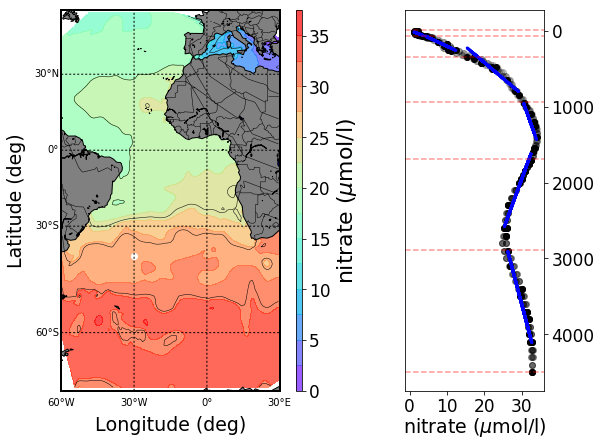

In [10]:
fig, (ax1, ax2) = oc_plt.plotRaw(-70, 50, -60, 30, ['nitrate'], 'plan', depth = 2000, add_profile = True, plot_pt = (minlat, minlon))
intervals, fig, ax2 = oc_an.column_split_byslope(_feat_data, _d, exist_plt = (fig, ax2))#, depth_lim = (min(_d), max(_d)))

## Finding /open ocean/ End-Members

In [16]:
from chem_ocean.ocean_data import return_from_psql

In [ ]:
tracer = 'phosphate'

In [50]:
_in_var_names = [tracer]
sum_names = ['station', 'longitude', 'latitude', 'depth'] + _in_var_names
cols = ', '.join(sum_names)
_x_var = 'longitude'
_y_var = 'latitude'

query = 'SELECT '+ cols+' FROM woa13 WHERE {} < (SELECT PERCENTILE_CONT(.0001) WITHIN GROUP(ORDER by {}) FROM woa13) ORDER BY depth;'.format(tracer, tracer)
# query = 'SELECT '+ cols+' FROM woa13 WHERE {} = (SELECT max({}) FROM woa13)  ORDER BY depth;'.format(tracer,tracer)

cluster_d, _feat_data, _x, _y, _d = return_from_psql(query, sum_names, _in_var_names, _x_var, _y_var)

In [ ]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt
map = Basemap(projection='merc', lon_0 = 0, lat_0 = 0, resolution='h')

In [65]:
ptlat = 0 #43.5
ptlon = -180 #39.5

In [66]:

atsea = False
ik = 0 
while ik < len(_x):
    ptlon = _x[ik]
    ptlat = _y[ik]
    lonrange = np.concatenate([np.arange(ptlon-2,ptlon+2, .2), np.arange(ptlon-2,ptlon+2, .2)])
    latpts = np.concatenate([[ptlat+ (4-(lon-ptlon)**2)**(.5) for lon in np.arange(ptlon-2,ptlon+2, .2)], [ptlat- (4-(lon-ptlon)**2)**(.5) for lon in np.arange(ptlon-2,ptlon+2, .2)]])
    ij = 0
    while ((atsea == False) and (ij<len(latpts))):
        print(atsea)
        x, y = map(lonrange[ij],latpts[ij])
        if map.is_land(x, y)== False:
            atsea = True
            print('atsea', atsea)
            print(ik-1)
#             break
        ij+=1
    ik+=1

False
-1
atsea True


In [60]:
len(latpts)

80

In [54]:
_x[6], _y[6]

(-64.5, 29.5)

In [12]:
lonrange = np.arange(ptlon-2,ptlon+2, .2)
latpts = [(4-(lon-ptlon)**2)**(.5)+ptlat for lon in lonrange]

In [13]:

from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt
map = Basemap(projection='merc', lon_0 = 0, lat_0 = 0, resolution='h')

for ik in range(len(latpts)):
    x, y = map(lonrange[ik],latpts[ik])
    print(map.is_land(x, y))

False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [67]:
_feat_data

[0.025600000000000001,
 0.024500000000000001,
 0.024500000000000001,
 0.024299999999999999,
 0.016299999999999999,
 0.0092999999999999992,
 0.024500000000000001,
 0.023099999999999999,
 0.0252,
 0.025499999999999998,
 0.025899999999999999,
 0.022599999999999999,
 0.019800000000000002,
 0.024199999999999999,
 0.022599999999999999,
 0.023,
 0.024500000000000001,
 0.025700000000000001,
 0.018800000000000001,
 0.018499999999999999,
 0.021899999999999999,
 0.02,
 0.0246,
 0.020199999999999999,
 0.025700000000000001,
 0.023099999999999999,
 0.0253,
 0.0195,
 0.02,
 0.023,
 0.025000000000000001,
 0.0224,
 0.0247,
 0.023900000000000001,
 0.0252,
 0.0253,
 0.020799999999999999,
 0.019300000000000001,
 0.020500000000000001,
 0.022499999999999999,
 0.022800000000000001,
 0.0218,
 0.024,
 0.0241,
 0.021499999999999998,
 0.0246,
 0.023699999999999999,
 0.024,
 0.025700000000000001,
 0.0253,
 0.021399999999999999,
 0.021100000000000001,
 0.022800000000000001,
 0.0224,
 0.017999999999999999,
 0.02429

In [68]:
minlat, maxlat, minlon, maxlon = -70, 70,-180, 180
slice_type = 'plan'
dpth = 0

0.8667969703674316
phosphate_plan_70s-70n_180w-180e_0m


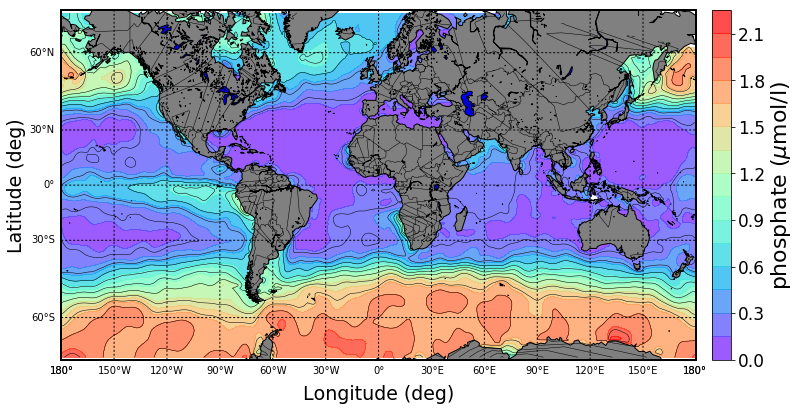

In [69]:
name1 = save_name(tracer, slice_type, minlat, maxlat, minlon, maxlon, depth = dpth)

fig, (ax1) = oc_plt.plotRaw(minlat, maxlat, minlon, maxlon, [tracer], slice_type, depth = dpth, plot_pt = (ptlat, ptlon))

# plt.savefig(path+name1+'.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

print(name1)

In [90]:
minlat, maxlat, minlon, maxlon = -70, 70,-30, -30
slice_type = 'NS_section'
dpth = 0

salinity_NS_section_70s-70n_30-30w


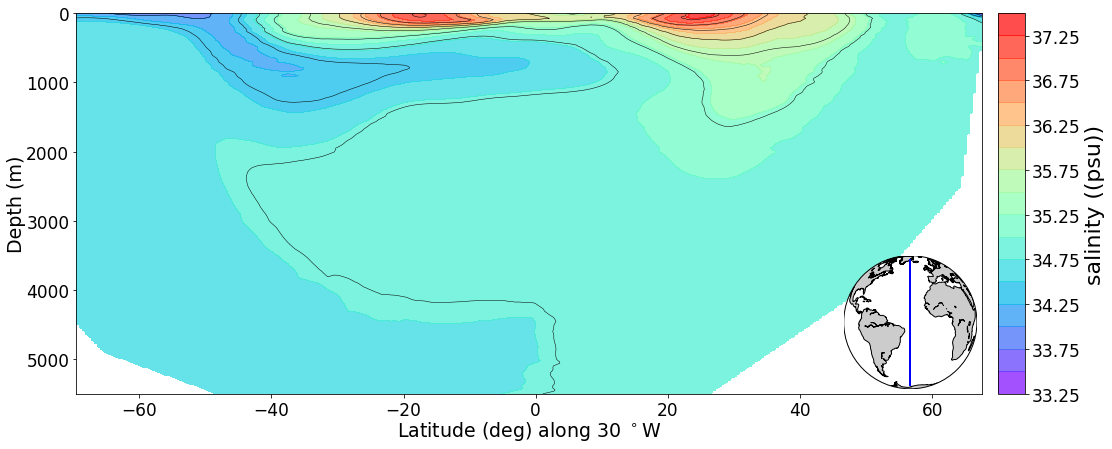

In [91]:
name1 = save_name(tracer, slice_type, minlat, maxlat, minlon, maxlon)

fig, (ax1) = oc_plt.plotRaw(minlat, maxlat, minlon, maxlon, [tracer], slice_type)#, depth = dpth, plot_pt = (ptlat, ptlon))

# plt.savefig(path+name1+'.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

print(name1)

In [88]:
tracer = 'salinity'
minlat, maxlat, minlon, maxlon = -50, -50,-50, 15
slice_type = 'EW_section'
dpth = 0

salinity_EW_section_50-50s_50w-15e


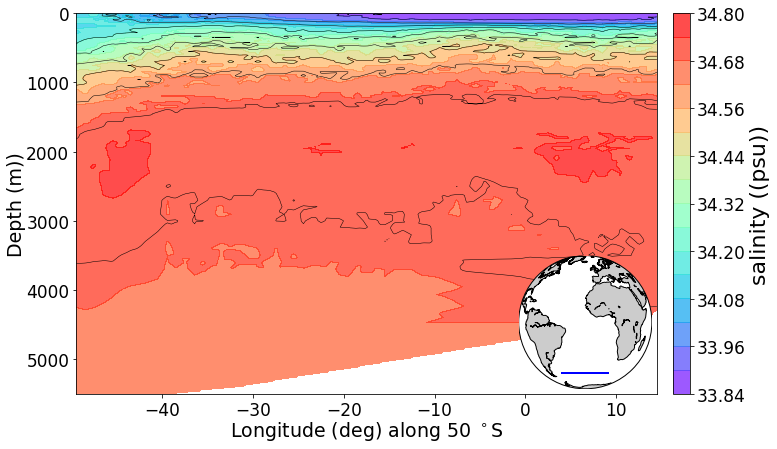

In [89]:
name1 = save_name(tracer, slice_type, minlat, maxlat, minlon, maxlon)

fig, (ax1) = oc_plt.plotRaw(minlat, maxlat, minlon, maxlon, [tracer], slice_type)#, depth = dpth, plot_pt = (ptlat, ptlon))

# plt.savefig(path+name1+'.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

print(name1)

0.24085593223571777


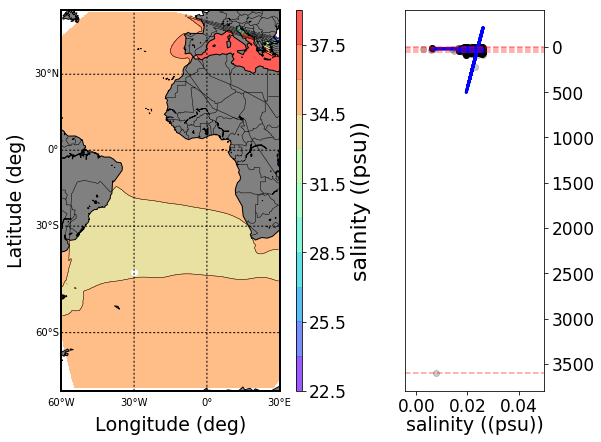

In [93]:
ptlat, ptlon = -45, -30
fig, (ax1, ax2) = oc_plt.plotRaw(-70, 50, -60, 30, [tracer], 'plan', depth = 1000, add_profile = True, plot_pt = (ptlat, ptlon))
intervals, fig, ax2 = oc_an.column_split_byslope(_feat_data, _d, exist_plt = (fig, ax2))#, depth_lim = (min(_d), max(_d)))